In [ ]:
!pip install -Uqq fastai

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 4.1 MB/s 
     |████████████████████████████████| 182 kB 75.8 MB/s 


In [ ]:
# Make sure we've got the latest version of fastai:

from fastai.vision.all import *

In [ ]:
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### on the cat and dog datatset 

### on the self dataset

In [ ]:
foodPath ="/content/drive/MyDrive/Lichen Planus Dataset/Lichen Planus binary Dataset/"

In [ ]:
len(get_image_files(foodPath))

173

In [ ]:
print(os.listdir(foodPath))

['Oral lichen planus', 'Cutaneous lichen planus']


In [ ]:
image_dir_path = foodPath
image_categories = os.listdir(image_dir_path)
print(image_categories)

['Oral lichen planus', 'Cutaneous lichen planus']


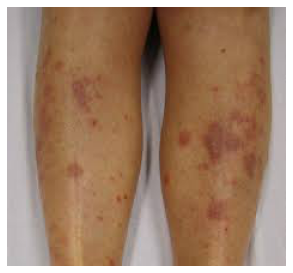

In [ ]:
img = PILImage.create('/content/drive/MyDrive/Lichen Planus Dataset/Lichen Planus binary Dataset/Cutaneous lichen planus/1.jpg')
img.show();

In [ ]:
labelA = 'Cutaneous lichen planus'
labelB = 'Oral lichen planus'


for img in get_image_files(foodPath): 
  if labelA in str(img):
   img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  else: os.remove(img)

len(get_image_files(foodPath))

173

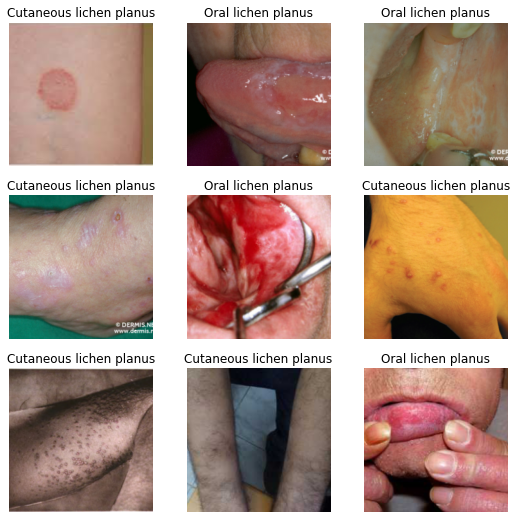

In [ ]:
def GetLabel(fileName):
 return fileName.split('-')[0]

dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=42,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.207959,2.470052,0.529412,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.607299,1.156918,0.411765,01:06
